In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Define the transform to preprocess the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

data_path = 'dataset'

dataset = datasets.ImageFolder(root=data_path, transform=transform)

In [3]:
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [4]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.fc = nn.Linear(32 * 56 * 56, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [5]:
model = SimpleCNN(num_classes=len(dataset.classes))

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [6]:
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(100 * correct / total)

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct / total)
    print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.2f}%, Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracies[-1]:.2f}%')

Epoch 1/10, Train Loss: 4.4877, Train Accuracy: 4.43%, Val Loss: 3.5740, Val Accuracy: 7.84%
Epoch 2/10, Train Loss: 2.8065, Train Accuracy: 29.06%, Val Loss: 3.1912, Val Accuracy: 11.76%
Epoch 3/10, Train Loss: 1.2618, Train Accuracy: 80.30%, Val Loss: 2.2724, Val Accuracy: 39.22%
Epoch 4/10, Train Loss: 0.4214, Train Accuracy: 96.55%, Val Loss: 1.9611, Val Accuracy: 49.02%
Epoch 5/10, Train Loss: 0.1172, Train Accuracy: 99.01%, Val Loss: 2.2964, Val Accuracy: 58.82%
Epoch 6/10, Train Loss: 0.0323, Train Accuracy: 100.00%, Val Loss: 2.7196, Val Accuracy: 54.90%
Epoch 7/10, Train Loss: 0.0096, Train Accuracy: 100.00%, Val Loss: 3.1660, Val Accuracy: 54.90%
Epoch 8/10, Train Loss: 0.0060, Train Accuracy: 100.00%, Val Loss: 3.3521, Val Accuracy: 54.90%
Epoch 9/10, Train Loss: 0.0027, Train Accuracy: 100.00%, Val Loss: 3.5044, Val Accuracy: 54.90%
Epoch 10/10, Train Loss: 0.0013, Train Accuracy: 100.00%, Val Loss: 3.5808, Val Accuracy: 54.90%


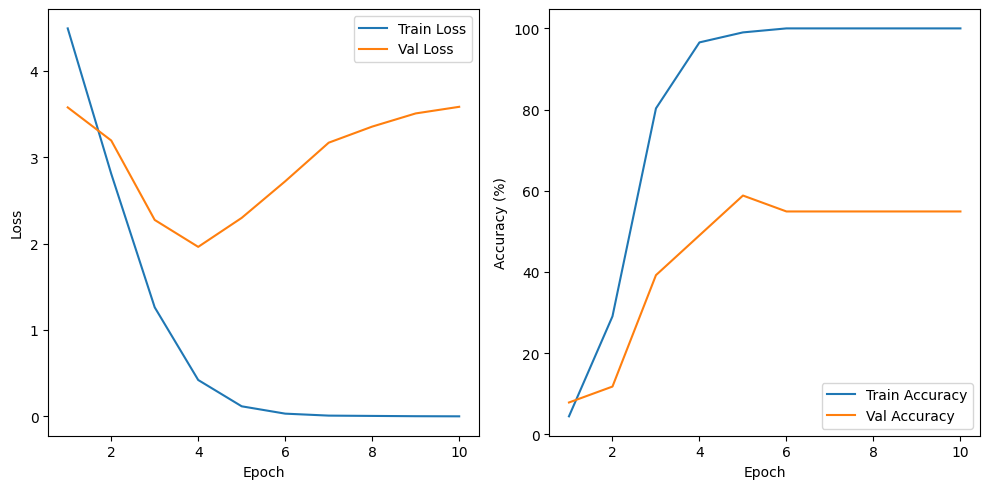

In [7]:
# Plot the loss and accuracy curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

torch.save(model.state_dict(), 'classification_model.pth')



<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
C:\Users\yashk\AppData\Local\Temp\ipykernel_21944\4064372745.py:1: SyntaxWarning: invalid escape sequence '\e'
  image_path = 'dataset\\va\eight.jpg'


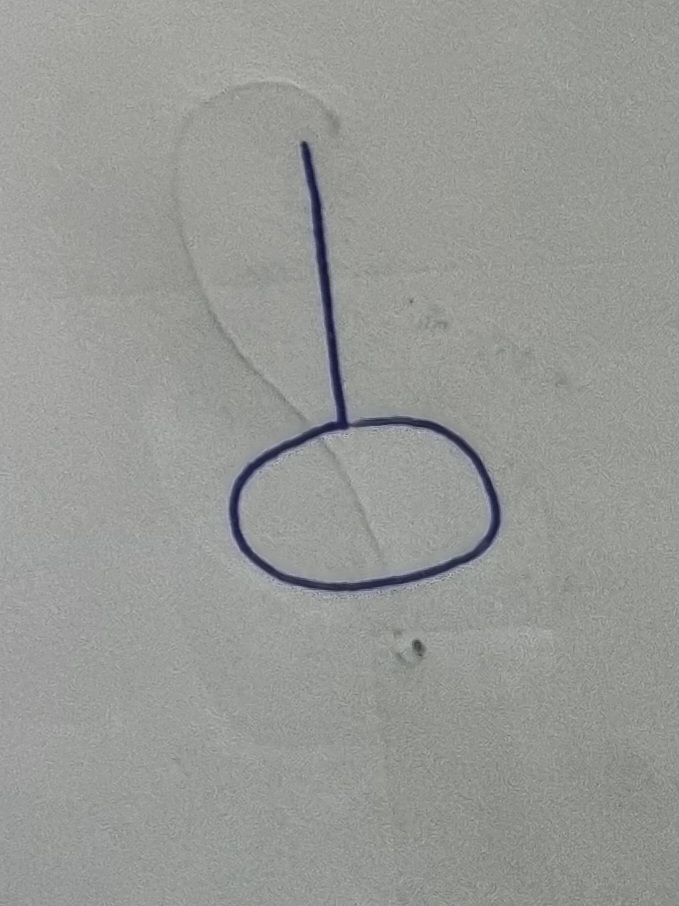

In [8]:
image_path = 'dataset\\va\eight.jpg'


Image.open(image_path)

In [9]:
import random
from PIL import Image
import torch

# Load the trained model
model.load_state_dict(torch.load('classification_model.pth'))
model.eval()

image = Image.open(image_path)


image = transform(image)

image = image.cpu().squeeze(0).unsqueeze(0)


# Make a prediction
with torch.no_grad():
    output = model(image)
    _, predicted = torch.max(output.data, 1)

# Print the prediction
print(f"Predicted class: {dataset.classes[predicted.item()]}")


Predicted class: va
